# Phần 3: Trực quan hóa Dữ liệu Nâng cao (Data Visualization in Advanced)

## 3.1. Giới thiệu

Sau khi đã thực hiện các phân tích số liệu ở Phần 2, trong phần này, chúng em sẽ biến những con số và bảng biểu đó thành các biểu đồ trực quan. Trực quan hóa dữ liệu là một bước cực kỳ quan trọng, giúp chúng em truyền tải các kết quả phân tích một cách rõ ràng, dễ hiểu và có tác động mạnh mẽ hơn.

Mục tiêu của Phần 3 là:
*   Sử dụng các loại biểu đồ đa dạng và hiện đại được yêu cầu trong dự án như Bar Charts, Area Plots, Histograms, Scatter Plots, và Choropleth Maps.
*   Mỗi biểu đồ sẽ được xây dựng để trả lời một câu hỏi phân tích cụ thể, làm nổi bật các xu hướng, sự phân bổ, mối quan-hệ-và-sự-khác-biệt-trong-dữ-liệu.
*   Sử dụng các thư viện trực quan hóa mạnh mẽ của Python như **Seaborn**, **Matplotlib**, và **Plotly** để tạo ra các biểu đồ không chỉ chính xác về mặt thông tin mà còn hấp dẫn về mặt thẩm mỹ.

Các biểu đồ được tạo ra trong phần này sẽ là sản phẩm cốt lõi của báo cáo, giúp người xem nhanh chóng nắm bắt được những insight chính về đại dịch COVID-19.

## 3.2. Chuẩn bị Môi trường và Dữ liệu

Trước khi bắt đầu vẽ, chúng em cần cài đặt và nhập các thư viện cần thiết, cũng như tải lại các bộ dữ liệu đã được xử lý và phân tích.


In [33]:

import pandas as pd
import numpy as np
# Nhóm 1: Matplotlib và Seaborn (cho biểu đồ thống kê tĩnh)
import matplotlib.pyplot as plt
import seaborn as sns

# Nhóm 2: Plotly và Bokeh (cho biểu đồ tương tác)
import plotly.express as px
import plotly.graph_objects as go

# Nhóm 3: Thư viện chuyên dụng cho bản đồ và biểu đồ đặc biệt
from pywaffle import Waffle


# Style và kích thước cho Matplotlib/Seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 10)

print("Tải dữ liệu và tất cả các thư viện cần thiết thành công.")





Tải dữ liệu và tất cả các thư viện cần thiết thành công.


In [4]:
# Tải lại dữ liệu đã được làm sạch
df_countries = pd.read_csv('../Data_main/covid_cleaned_country_data.csv')
df_countries['date'] = pd.to_datetime(df_countries['date'])

df_agg = pd.read_csv('../Data_main/covid_owid_aggregated_data.csv')
df_agg['date'] = pd.to_datetime(df_agg['date'])

print("Tải lại các bộ dữ liệu thành công.")
print(f"Dữ liệu quốc gia (df_countries): {df_countries.shape[0]} hàng")
print(f"Dữ liệu tổng hợp (df_agg): {df_agg.shape[0]} hàng")


Tải lại các bộ dữ liệu thành công.
Dữ liệu quốc gia (df_countries): 395311 hàng
Dữ liệu tổng hợp (df_agg): 34124 hàng


C:\Users\Admin\AppData\Local\Temp\ipykernel_30680\991465690.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_agg = pd.read_csv('../Data_main/covid_owid_aggregated_data.csv')


In [5]:
# Tìm index của hàng có tỷ lệ ca nhiễm trên 1 triệu dân cao nhất cho mỗi quốc gia
max_cases_indices = df_countries.groupby('location')['total_cases_per_million'].idxmax()
# Lấy toàn bộ thông tin của các hàng đó
data_for_map = df_countries.loc[max_cases_indices]

# Hiển thị 5 dòng đầu của dữ liệu đã chuẩn bị để kiểm tra
print("Dữ liệu tại thời điểm có tỷ lệ ca nhiễm cao nhất của mỗi quốc gia, sẵn sàng để vẽ bản đồ:")
print(data_for_map[['location', 'iso_code', 'date', 'total_cases_per_million']].head())


Dữ liệu tại thời điểm có tỷ lệ ca nhiễm cao nhất của mỗi quốc gia, sẵn sàng để vẽ bản đồ:
            location iso_code       date  total_cases_per_million
1582     Afghanistan      AFG 2024-05-05                 5796.468
3256         Albania      ALB 2024-05-05               118491.020
5021         Algeria      DZA 2024-08-04                 5984.050
6373  American Samoa      ASM 2023-09-17               172831.600
7914         Andorra      AND 2023-05-07               602280.440


In [6]:
# Vẽ bản đồ Choropleth
fig = px.choropleth(
    data_for_map, 
    locations="iso_code",
    color="total_cases_per_million",
    hover_name="location",
    color_continuous_scale=px.colors.sequential.OrRd, # Dải màu từ Cam tới Đỏ
    title="Bản đồ Phân bổ Tỷ lệ Ca nhiễm COVID-19 trên 1 Triệu dân (Cao nhất từng Ghi nhận)" # <-- Cập nhật tiêu đề
)

# Tùy chỉnh giao diện cho đẹp hơn
fig.update_layout(
    title_x=0.5, # Căn giữa tiêu đề
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular' # Kiểu chiếu bản đồ
    )
)

# Hiển thị biểu đồ
fig.show()


In [7]:

# Tìm index của hàng có tỷ lệ tiêm chủng cao nhất cho mỗi quốc gia
max_vax_indices = df_countries.groupby('location')['people_fully_vaccinated_per_hundred'].idxmax()
max_vax_data = df_countries.loc[max_vax_indices]

fig_max_vax = px.choropleth(
    max_vax_data,
    locations="iso_code",
    color="people_fully_vaccinated_per_hundred",
    hover_name="location",
    color_continuous_scale=px.colors.sequential.Greens,
    title="Bản đồ Phân bổ Tỷ lệ Tiêm chủng Đầy đủ Cao nhất Từng Ghi nhận (%)"
)

# Tùy chỉnh giao diện (có thể thêm width/height nếu cần)
fig_max_vax.update_layout(
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

# Hiển thị biểu đồ
fig_max_vax.show()


In [8]:

# Tìm index của hàng có tỷ lệ tử vong cao nhất cho mỗi quốc gia
max_deaths_indices = df_countries.groupby('location')['total_deaths_per_million'].idxmax()
max_deaths_data = df_countries.loc[max_deaths_indices]


fig_max_deaths = px.choropleth(
    max_deaths_data,
    locations="iso_code",
    color="total_deaths_per_million",
    hover_name="location",
    color_continuous_scale=px.colors.sequential.Reds, # Dải màu Đỏ
    title="Bản đồ Phân bổ Tỷ lệ Ca tử vong trên 1 Triệu dân (Cao nhất từng Ghi nhận)"
)

# Tùy chỉnh giao diện
fig_max_deaths.update_layout(
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

# Hiển thị biểu đồ
fig_max_deaths.show()


In [9]:
top_10_cases = df_countries.groupby('location')['total_cases'].max().nlargest(10).sort_values()

fig = px.bar(
    top_10_cases,
    x=top_10_cases.values,
    y=top_10_cases.index,
    orientation='h',
    title='Top 10 Quốc gia có Tổng số Ca nhiễm Cao nhất',
    labels={'x': 'Tổng số ca nhiễm', 'y': 'Quốc gia'}
)

fig.show()


In [10]:
top_10_deaths_per_mil = df_countries.groupby('location')['total_deaths_per_million'].max().nlargest(10).sort_values()

fig = px.bar(
    top_10_deaths_per_mil,
    x=top_10_deaths_per_mil.values,
    y=top_10_deaths_per_mil.index,
    orientation='h',
    title='Top 10 Quốc gia có Tỷ lệ Tử vong trên 1 Triệu dân Cao nhất',
    labels={'x': 'Số ca tử vong / 1 triệu dân', 'y': 'Quốc gia'},
    color_discrete_sequence=['#E74C3C'] # Thêm màu đỏ
)

fig.show()


In [11]:
# Nhóm dữ liệu toàn cầu theo ngày
global_daily_cases = df_countries.groupby('date')['new_cases'].sum()

# Vẽ biểu đồ vùng
fig = px.area(
    global_daily_cases,
    x=global_daily_cases.index,
    y=global_daily_cases.values,
    title='Số ca nhiễm mới Toàn cầu theo Ngày',
    labels={'x': 'Ngày', 'y': 'Số ca nhiễm mới'}
)

fig.update_layout(title_x=0.5)
fig.show()


In [12]:
# Nhóm dữ liệu toàn cầu theo ngày
global_daily_deaths = df_countries.groupby('date')['new_deaths'].sum()

# Vẽ biểu đồ vùng
fig = px.area(
    global_daily_deaths,
    x=global_daily_deaths.index,
    y=global_daily_deaths.values,
    title='Số ca tử vong mới Toàn cầu theo Ngày',
    labels={'x': 'Ngày', 'y': 'Số ca tử vong mới'},
    color_discrete_sequence=['#E74C3C'] # Đổi màu cho khác
)

fig.update_layout(title_x=0.5)
fig.show()


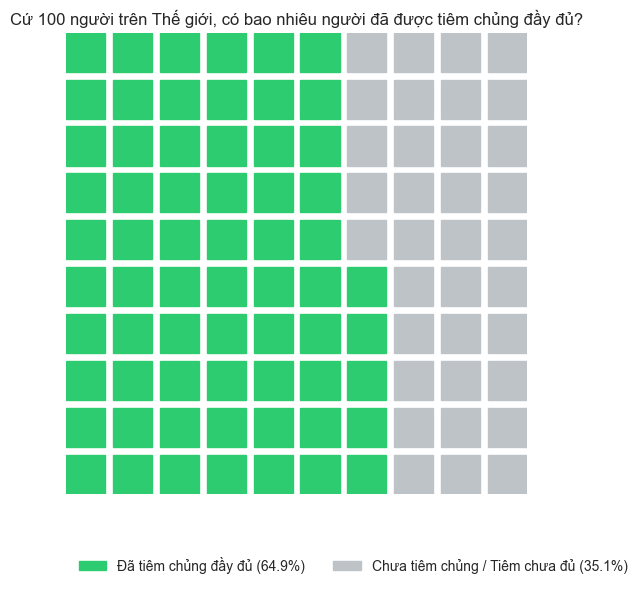

In [13]:
# Tìm hàng có số người tiêm chủng đầy đủ cao nhất cho mỗi quốc gia
max_vax_rows = df_countries.loc[df_countries.groupby('location')['people_fully_vaccinated'].idxmax()]

# Tính tổng số người đã tiêm và tổng dân số từ chính các hàng đó
total_fully_vaccinated = max_vax_rows['people_fully_vaccinated'].sum()
total_population = max_vax_rows['population'].sum()
percentage_vaccinated = (total_fully_vaccinated / total_population) * 100

# Dữ liệu cho biểu đồ Waffle
data = {
    'Đã tiêm chủng đầy đủ': percentage_vaccinated,
    'Chưa tiêm chủng / Tiêm chưa đủ': 100 - percentage_vaccinated
}

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    colors=("#2ECC71", "#BDC3C7"),
    title={'label': 'Cứ 100 người trên Thế giới, có bao nhiêu người đã được tiêm chủng đầy đủ?', 'loc': 'center'},
    labels=[f"{k} ({v:.1f}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.2), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)
)
plt.show() # Thêm lệnh này để hiển thị biểu đồ


In [14]:
# Lấy tổng ca nhiễm cao nhất của mỗi nước
max_cases_data = df_countries.groupby(['continent', 'location'])['total_cases'].max().reset_index()

# Nhóm theo châu lục và tính tổng
continent_cases = max_cases_data.groupby('continent')['total_cases'].sum().reset_index()

# Vẽ biểu đồ tròn
fig = px.pie(
    continent_cases,
    values='total_cases',
    names='continent',
    title='Tỷ lệ Phân bổ Ca nhiễm theo Châu lục'
)
fig.show()

In [15]:
# Chuẩn bị dữ liệu
max_stats_data = df_countries.groupby('location').agg({
    'total_cases_per_million': 'max',
    'gdp_per_capita': 'first'
}).reset_index()

# Vẽ biểu đồ Scatter với đường xu hướng
fig = px.scatter(
    max_stats_data,
    x="gdp_per_capita",
    y="total_cases_per_million",
    hover_name="location",
    title="Mối tương quan giữa GDP và Tỷ lệ ca nhiễm",
    labels={'gdp_per_capita': 'GDP bình quân đầu người ($)', 'total_cases_per_million': 'Tổng ca nhiễm / 1 triệu dân'},
    trendline="ols" # Thêm đường xu hướng
)

fig.update_layout(title_x=0.5)
fig.show()


In [16]:
# Chuẩn bị dữ liệu
max_stats_data = df_countries.groupby('location').agg({
    'total_deaths_per_million': 'max',
    'gdp_per_capita': 'first'
}).reset_index()

# Vẽ biểu đồ
fig = px.scatter(
    max_stats_data,
    x="gdp_per_capita",
    y="total_deaths_per_million",
    hover_name="location",
    title="GDP vs. Tỷ lệ tử vong",
    trendline="ols"
)
fig.show()


In [17]:
# Chuẩn bị dữ liệu
max_stats_data = df_countries.groupby('location').agg({
    'people_fully_vaccinated_per_hundred': 'max',
    'gdp_per_capita': 'first'
}).reset_index()

# Vẽ biểu đồ
fig = px.scatter(
    max_stats_data,
    x="gdp_per_capita",
    y="people_fully_vaccinated_per_hundred",
    hover_name="location",
    title="GDP vs. Tỷ lệ tiêm chủng",
    trendline="ols"
)
fig.show()


In [18]:
# Chuẩn bị dữ liệu
max_stats_data = df_countries.groupby('location').agg({
    'total_deaths_per_million': 'max',
    'life_expectancy': 'first'
}).reset_index()

# Vẽ biểu đồ
fig = px.scatter(
    max_stats_data,
    x="life_expectancy",
    y="total_deaths_per_million",
    hover_name="location",
    title="Tuổi thọ vs. Tỷ lệ tử vong",
    trendline="ols"
)
fig.show()


In [19]:
# Chuẩn bị dữ liệu
max_stats_data = df_countries.groupby('location').agg({
    'total_deaths_per_million': 'max',
    'aged_65_older': 'first'
}).reset_index()

# Vẽ biểu đồ
fig = px.scatter(
    max_stats_data,
    x="aged_65_older",
    y="total_deaths_per_million",
    hover_name="location",
    title="Tỷ lệ dân số trên 65 tuổi vs. Tỷ lệ tử vong",
    trendline="ols"
)
fig.show()


In [20]:
# Chuẩn bị dữ liệu
max_stats_data = df_countries.groupby('location').agg({
    'total_deaths_per_million': 'max',
    'hospital_beds_per_thousand': 'first'
}).reset_index()

# Vẽ biểu đồ
fig = px.scatter(
    max_stats_data,
    x="hospital_beds_per_thousand",
    y="total_deaths_per_million",
    hover_name="location",
    title="Số giường bệnh / 1000 dân vs. Tỷ lệ tử vong",
    trendline="ols"
)
fig.show()


In [21]:
# Chuẩn bị dữ liệu
max_stats_data = df_countries.groupby('location').agg({
    'total_deaths_per_million': 'max',
    'cardiovasc_death_rate': 'first'
}).reset_index()

# Vẽ biểu đồ
fig = px.scatter(
    max_stats_data,
    x="cardiovasc_death_rate",
    y="total_deaths_per_million",
    hover_name="location",
    title="Tỷ lệ tử vong do bệnh tim mạch vs. Tỷ lệ tử vong do COVID-19",
    trendline="ols"
)
fig.show()


In [22]:
# Chuẩn bị dữ liệu
max_stats_data = df_countries.groupby('location').agg({
    'total_deaths_per_million': 'max',
    'male_smokers': 'first'
}).reset_index()

# Vẽ biểu đồ
fig = px.scatter(
    max_stats_data,
    x="male_smokers",
    y="total_deaths_per_million",
    hover_name="location",
    title="Tỷ lệ Nam giới Hút thuốc vs. Tỷ lệ Tử vong do COVID-19",
    trendline="ols"
)
fig.show()


In [23]:
# Chuẩn bị dữ liệu
max_stats_data = df_countries.groupby('location').agg({
    'total_cases_per_million': 'max',
    'handwashing_facilities': 'first'
}).reset_index()

# Vẽ biểu đồ
fig = px.scatter(
    max_stats_data,
    x="handwashing_facilities",
    y="total_cases_per_million",
    hover_name="location",
    title="Điều kiện Vệ sinh vs. Tỷ lệ Ca nhiễm",
    trendline="ols"
)
fig.show()


In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Lọc dữ liệu của Việt Nam
vietnam_data = df_countries[df_countries['location'] == 'Vietnam'].copy()

# Tạo biểu đồ với 2 trục y
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Thêm đường Stringency Index (trục y chính - bên trái)
fig.add_trace(
    go.Scatter(x=vietnam_data['date'], y=vietnam_data['stringency_index'], name="Chỉ số nghiêm ngặt"),
    secondary_y=False,
)

# Thêm đường Reproduction Rate (trục y phụ - bên phải)
fig.add_trace(
    go.Scatter(x=vietnam_data['date'], y=vietnam_data['reproduction_rate'], name="Tỷ lệ lây nhiễm (R)"),
    secondary_y=True,
)

# Đặt tiêu đề và tên cho các trục
fig.update_layout(
    title_text="Chỉ số nghiêm ngặt vs. Tỷ lệ lây nhiễm tại Việt Nam",
    title_x=0.5
)
fig.update_xaxes(title_text="Ngày")
fig.update_yaxes(title_text="<b>Chỉ số nghiêm ngặt</b> (0-100)", secondary_y=False)
fig.update_yaxes(title_text="<b>Tỷ lệ lây nhiễm (R)</b>", secondary_y=True)

fig.show()


In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Lọc dữ liệu của Mỹ
us_data = df_countries[df_countries['location'] == 'United States'].copy()

# Tạo biểu đồ với 2 trục y
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Thêm đường Stringency Index (trục y chính - bên trái)
fig.add_trace(
    go.Scatter(x=us_data['date'], y=us_data['stringency_index'], name="Chỉ số nghiêm ngặt"),
    secondary_y=False,
)

# Thêm đường Reproduction Rate (trục y phụ - bên phải)
fig.add_trace(
    go.Scatter(x=us_data['date'], y=us_data['reproduction_rate'], name="Tỷ lệ lây nhiễm (R)"),
    secondary_y=True,
)

# Đặt tiêu đề và tên cho các trục
fig.update_layout(
    title_text="Chỉ số nghiêm ngặt vs. Tỷ lệ lây nhiễm tại Mỹ",
    title_x=0.5
)
fig.update_xaxes(title_text="Ngày")
fig.update_yaxes(title_text="Chỉ số nghiêm ngặt (0-100)", secondary_y=False)
fig.update_yaxes(title_text="Tỷ lệ lây nhiễm (R)", secondary_y=True)

In [ ]:
# Biểu đồ mối tương quan giữa tỷ lệ tiêm chủng đầy đủ và tổng số ca nhiễm trên 1 triệu dân

max_stats_data = df_countries.groupby('location').agg({
    'people_fully_vaccinated_per_hundred': 'max',
    'total_cases_per_million': 'max'
}).reset_index()

fig = px.scatter(
    max_stats_data,
    x="people_fully_vaccinated_per_hundred",
    y="total_cases_per_million",
    hover_name="location",
    title="Mối tương quan giữa Tỷ lệ Tiêm chủng Đầy đủ (%) và Số ca mắc COVID-19 trên 1 triệu dân",
    labels={
        'people_fully_vaccinated_per_hundred': 'Tỷ lệ tiêm chủng đầy đủ (%)',
        'total_cases_per_million': 'Số ca mắc trên 1 triệu dân'
    },
    trendline="ols"
)

fig.update_layout(title_x=0.5)
fig.show()

In [27]:


# Nhóm dữ liệu toàn cầu theo ngày
global_tests = df_countries.groupby('date')['new_tests'].sum()
global_positive_rate = df_countries.groupby('date')['positive_rate'].mean()

# Tạo biểu đồ với 2 trục y
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Đường số lượng xét nghiệm mới (trục y trái)
fig.add_trace(
    go.Scatter(x=global_tests.index, y=global_tests.values, name="Số lượng xét nghiệm mới"),
    secondary_y=False,
)

# Đường tỷ lệ dương tính (trục y phải)
fig.add_trace(
    go.Scatter(x=global_positive_rate.index, y=global_positive_rate.values, name="Tỷ lệ dương tính"),
    secondary_y=True,
)

# Đặt tiêu đề và tên trục
fig.update_layout(
    title_text="So sánh Số lượng xét nghiệm mới và Tỷ lệ dương tính theo thời gian (Toàn cầu)",
    title_x=0.5
)
fig.update_xaxes(title_text="Ngày")
fig.update_yaxes(title_text="Số lượng xét nghiệm mới", secondary_y=False)
fig.update_yaxes(title_text="Tỷ lệ dương tính", secondary_y=True)

fig.show()

In [28]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Nhóm dữ liệu toàn cầu theo ngày
global_new_cases = df_countries.groupby('date')['new_cases'].sum()
global_reproduction_rate = df_countries.groupby('date')['reproduction_rate'].mean()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=global_new_cases.index, y=global_new_cases.values, name="Số ca nhiễm mới"),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(x=global_reproduction_rate.index, y=global_reproduction_rate.values, name="Chỉ số lây lan (R)"),
    secondary_y=True,
)

# Đặt tiêu đề và tên trục
fig.update_layout(
    title_text="Tương quan theo thời gian giữa Số ca nhiễm mới và Chỉ số lây lan (Toàn cầu)",
    title_x=0.5
)
fig.update_xaxes(title_text="Ngày")
fig.update_yaxes(title_text="Số ca nhiễm mới", secondary_y=False)
fig.update_yaxes(title_text="Chỉ số lây lan (R)", secondary_y=True)

fig.show()

In [29]:

import pandas as pd
df_agg = pd.read_csv('..\Data_main\covid_owid_aggregated_data.csv')
df_agg['date'] = pd.to_datetime(df_agg['date'])


income_iso_codes = ['OWID_HIC', 'OWID_LIC', 'OWID_LMC']


income_groups_df = df_agg[df_agg['iso_code'].isin(income_iso_codes)]

C:\Users\Admin\AppData\Local\Temp\ipykernel_30680\3919816356.py:2: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



In [30]:
comparison_max = income_groups_df.groupby('location').agg({
     'total_cases_per_million': 'max',
     'total_deaths_per_million': 'max',
     'people_fully_vaccinated_per_hundred': 'max',
 }).reset_index()

In [31]:
import plotly.express as px

# Biểu đồ 1: So sánh tổng ca nhiễm trên 1 triệu dân
fig_cases = px.bar(
    comparison_max,
    x='location',
    y='total_cases_per_million',
    title='Tổng ca nhiễm trên 1 triệu dân theo nhóm thu nhập',
    labels={'location': 'Nhóm thu nhập', 'total_cases_per_million': 'Ca nhiễm / 1 triệu dân'},
    color='location'
)
fig_cases.update_layout(title_x=0.5)
fig_cases.show()

# Biểu đồ 2: So sánh tỷ lệ tử vong và tỷ lệ tiêm chủng đầy đủ
fig_other = px.bar(
    comparison_max,
    x='location',
    y=['total_deaths_per_million', 'people_fully_vaccinated_per_hundred'],
    barmode='group',
    title='Tỷ lệ tử vong và tỷ lệ tiêm chủng đầy đủ theo nhóm thu nhập',
    labels={
        'location': 'Nhóm thu nhập',
        'value': 'Giá trị',
        'variable': 'Chỉ số'
    }
)
fig_other.update_layout(title_x=0.5)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [32]:
import plotly.express as px

# Tính CFR cho từng nhóm thu nhập
max_stats_income = income_groups_df.groupby('location').agg({
    'total_cases': 'max',
    'total_deaths': 'max'
}).reset_index()
max_stats_income['case_fatality_rate'] = (max_stats_income['total_deaths'] / max_stats_income['total_cases']) * 100

# Vẽ biểu đồ cột so sánh CFR
fig_cfr = px.bar(
    max_stats_income,
    x='location',
    y='case_fatality_rate',
    title='So sánh Tỷ lệ tử vong (CFR) cao nhất của các nhóm thu nhập',
    labels={'location': 'Nhóm thu nhập', 'case_fatality_rate': 'Tỷ lệ tử vong (%)'},
    color='location'
)
fig_cfr.update_layout(title_x=0.5)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

